Importando Dados e blibiotecas


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dfclientes= pd.read_csv("./clientes.csv", sep=",",header=0)
dfpedidos= pd.read_csv("./pedidos.csv", sep=",",header=0)
dfprodutos= pd.read_csv("./produtos.csv", sep=",",header=0)
dfvendas = pd.read_csv("./vendas.csv", sep=",",header=0)
pd.set_option('display.float_format', '{:.2f}'.format)

Visualizando os Dataframes.

In [5]:
dfclientes

,id_cliente,razao_social,pais,uf,municipio
0,7082,Silveira,BRASIL,MG,COROMANDEL
1,4951,Cunha - Me,BRASIL,AC,CRUZEIRO DO SUL
2,2560,Da Cunha Gonçalves - Ei,BRASIL,AC,BUJARI
3,23880,Mendes,BRASIL,AC,RIO BRANCO
4,17500,Da Rosa,BRASIL,MG,EXTREMA
...,...,...,...,...,...
30127,5380,Pacheco S/A,BRASIL,SC,JARAGUA DO SUL
30128,25446,Viana,BRASIL,SC,CRICIUMA
30129,9218,Ramos Das Neves Ltda.,BRASIL,RS,CAXIAS DO SUL
30130,29113,Farias,BRASIL,PR,CURITIBA


In [6]:
dfpedidos

,id_pedido,id_produto,item,quantidade,desconto
0,219412,1163,1,12,0.00
1,840661,76569,8,12,-0.19
2,834381,59833,4,12,-0.15
3,830692,832,3,12,0.00
4,230829,21977,2,60,-0.08
...,...,...,...,...,...
2024431,498880,20977,1,12,0.00
2024432,435570,24621,3,12,0.00
2024433,838647,65044,4,12,0.00
2024434,435621,43756,5,12,0.00


In [7]:
dfprodutos

,id_produto,tipo_produto,material,cor,preco
0,1163,TÊNIS,GASPEA PRONTA LINHO LISBOA,PRETO,75.95
1,76569,SANDÁLIAS,PELICA/NAPA PELE STRECH,BRANCO OFF,59.97
2,59833,SANDÁLIAS,NAPA TURIM,PRETO,48.42
3,832,FLATS,TIRA PRONTA CAMURCA FLEX,PRETO,39.48
4,21977,SANDÁLIAS,NAPA TURIM/TIRA PRONTA STRASS,CRISTAL/CREME/BRANCO OFF,57.32
...,...,...,...,...,...
56204,76959,SAPATOS,NAPA FLOATHER NATURE,ARGILA,94.19
56205,78331,SAPATOS,NAPA TURIM,PRETO,42.67
56206,76606,TÊNIS,NAPA LINHO GLAM/METALIZADO PREMIUM,NUDE/OURO ROSADO,62.58
56207,78063,TÊNIS,NAPA TURIM,PRETO,41.12


In [8]:
dfvendas

,data,id_pedido,id_cliente,status
0,2023-01-02,14233,935,faturado
1,2023-01-02,13835,20017,faturado
2,2023-01-02,13747,2192,faturado
3,2023-01-02,14303,262,cancelado
4,2023-01-02,13942,6612,faturado
...,...,...,...,...
607471,2025-03-31,882093,23515,faturado
607472,2025-03-31,880971,18471,faturado
607473,2025-03-31,880696,16610,faturado
607474,2025-03-31,880983,10430,aberto


Depois de visualizar os dataframes, reconheci que talvez seja melhor juntar todos respeitando as chaves primárias e utilizando alguns left JOIN, em todos arquivos para unificar tudo em um arquivo só. Assim ficará interessante e mais fácil realizar análises:

In [9]:
df_main = dfvendas \
    .merge(dfpedidos, on="id_pedido", how="left") \
    .merge(dfprodutos, on="id_produto", how="left") \
    .merge(dfclientes, on="id_cliente", how="left")

In [10]:
df_main

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio
0,2023-01-02,14233,935,faturado,14676,1,12,-0.08,BOTAS,TELA VENEZA/NAPA BERLIM,PRETO,101.85,Das Neves,BRASIL,MG,ITAGUARA
1,2023-01-02,13835,20017,faturado,14786,1,16,-0.14,BOTAS,NAPA FLOATHER ZURIQUE/ELASTICO,PRETO,117.34,Alves - Ei,BRASIL,PR,CURITIBA
2,2023-01-02,13747,2192,faturado,16566,1,8,-0.08,BOTAS,METALIZADO LISBOA,GRAFITE,155.58,Fernandes,BRASIL,MG,VICOSA
3,2023-01-02,13747,2192,faturado,16438,2,8,-0.08,BOTAS,NAPA BERLIM,PRETO,144.92,Fernandes,BRASIL,MG,VICOSA
4,2023-01-02,14303,262,cancelado,8214,2,12,-0.17,SANDÁLIAS,NAPA FLOATHER NATURE,PRETO,70.43,Da Rosa,BRASIL,MG,BELO HORIZONTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024431,2025-03-31,880983,10430,aberto,67341,1,12,-0.08,SANDÁLIAS,PELICA/T P PELICA/T P PELE STRECH,BRANCO OFF,74.06,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024432,2025-03-31,880983,10430,aberto,39036,2,12,-0.08,SANDÁLIAS,PELICA,BEGE,53.78,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024433,2025-03-31,881440,27813,faturado,59636,3,12,-0.06,FLATS,NP FLOAT NAT/NP LEZ PARIS/TI FLOREN,CREME/BRANCO-CRISTAL,49.47,Da Rosa,BRASIL,MG,MANHUACU
2024434,2025-03-31,881440,27813,faturado,51315,2,12,-0.06,FLATS,NP FLOATHER NATURE/TIRA FLORENCA,PRETO/CRISTAL,44.45,Da Rosa,BRASIL,MG,MANHUACU


In [11]:
df_main.dtypes

data             object
id_pedido         int64
id_cliente        int64
status           object
id_produto        int64
item              int64
quantidade        int64
desconto        float64
tipo_produto     object
material         object
cor              object
preco           float64
razao_social     object
pais             object
uf               object
municipio        object
dtype: object

In [12]:
df_main['data'] = pd.to_datetime(df_main['data'])

In [13]:
df_main.dtypes

data            datetime64[ns]
id_pedido                int64
id_cliente               int64
status                  object
id_produto               int64
item                     int64
quantidade               int64
desconto               float64
tipo_produto            object
material                object
cor                     object
preco                  float64
razao_social            object
pais                    object
uf                      object
municipio               object
dtype: object

Procedimento para conversão da coluna data para padrão brasileiro.

In [14]:
df_main['data'] = df_main['data'].dt.strftime('%d/%m/%Y')

In [15]:
df_main

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio
0,02/01/2023,14233,935,faturado,14676,1,12,-0.08,BOTAS,TELA VENEZA/NAPA BERLIM,PRETO,101.85,Das Neves,BRASIL,MG,ITAGUARA
1,02/01/2023,13835,20017,faturado,14786,1,16,-0.14,BOTAS,NAPA FLOATHER ZURIQUE/ELASTICO,PRETO,117.34,Alves - Ei,BRASIL,PR,CURITIBA
2,02/01/2023,13747,2192,faturado,16566,1,8,-0.08,BOTAS,METALIZADO LISBOA,GRAFITE,155.58,Fernandes,BRASIL,MG,VICOSA
3,02/01/2023,13747,2192,faturado,16438,2,8,-0.08,BOTAS,NAPA BERLIM,PRETO,144.92,Fernandes,BRASIL,MG,VICOSA
4,02/01/2023,14303,262,cancelado,8214,2,12,-0.17,SANDÁLIAS,NAPA FLOATHER NATURE,PRETO,70.43,Da Rosa,BRASIL,MG,BELO HORIZONTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024431,31/03/2025,880983,10430,aberto,67341,1,12,-0.08,SANDÁLIAS,PELICA/T P PELICA/T P PELE STRECH,BRANCO OFF,74.06,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024432,31/03/2025,880983,10430,aberto,39036,2,12,-0.08,SANDÁLIAS,PELICA,BEGE,53.78,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024433,31/03/2025,881440,27813,faturado,59636,3,12,-0.06,FLATS,NP FLOAT NAT/NP LEZ PARIS/TI FLOREN,CREME/BRANCO-CRISTAL,49.47,Da Rosa,BRASIL,MG,MANHUACU
2024434,31/03/2025,881440,27813,faturado,51315,2,12,-0.06,FLATS,NP FLOATHER NATURE/TIRA FLORENCA,PRETO/CRISTAL,44.45,Da Rosa,BRASIL,MG,MANHUACU


In [16]:
df_main.to_csv('bancofull.csv', index=False, encoding='utf-8-sig')

Tem muitas colunas com tipos incorretos, iniciando processo de conversão.

In [17]:
df_main['data'] = pd.to_datetime(df_main['data'], dayfirst=True)



In [18]:
df_main.dtypes

data            datetime64[ns]
id_pedido                int64
id_cliente               int64
status                  object
id_produto               int64
item                     int64
quantidade               int64
desconto               float64
tipo_produto            object
material                object
cor                     object
preco                  float64
razao_social            object
pais                    object
uf                      object
municipio               object
dtype: object

In [19]:
df_main['id_pedido'] = df_main['id_pedido'].astype(str)
df_main['id_cliente'] = df_main['id_cliente'].astype(str)
df_main['id_produto'] = df_main['id_produto'].astype(str)


In [20]:
df_main.dtypes

data            datetime64[ns]
id_pedido               object
id_cliente              object
status                  object
id_produto              object
item                     int64
quantidade               int64
desconto               float64
tipo_produto            object
material                object
cor                     object
preco                  float64
razao_social            object
pais                    object
uf                      object
municipio               object
dtype: object

In [21]:
df_main.isna().sum()

data             0
id_pedido        0
id_cliente       0
status           0
id_produto       0
item             0
quantidade       0
desconto         0
tipo_produto     2
material         0
cor              0
preco            0
razao_social     0
pais             0
uf              34
municipio        0
dtype: int64

Verificando linhas duplicadas

In [22]:
duplicados = df_main.groupby(df_main.columns.tolist(),as_index=False).size()
duplicados[duplicados["size"]>1]

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio,size


In [23]:
len(df_main)

2024436

Calculando frequencia de valores

In [24]:
freqstatus = df_main['status'].value_counts()
freqproduto = df_main['tipo_produto'].value_counts()
freqmunicipio = df_main['municipio'].value_counts()
freqrazaosocial = df_main['razao_social'].value_counts()


In [25]:
porc_status = df_main['status'].value_counts(normalize=True) * 100
porc_produto = df_main['tipo_produto'].value_counts(normalize=True) * 100
porc_municipio = df_main['municipio'].value_counts(normalize=True) * 100
porc_razaosocial = df_main['razao_social'].value_counts(normalize=True) * 100

Text(0, 0.5, 'Frequência em porcentagem')

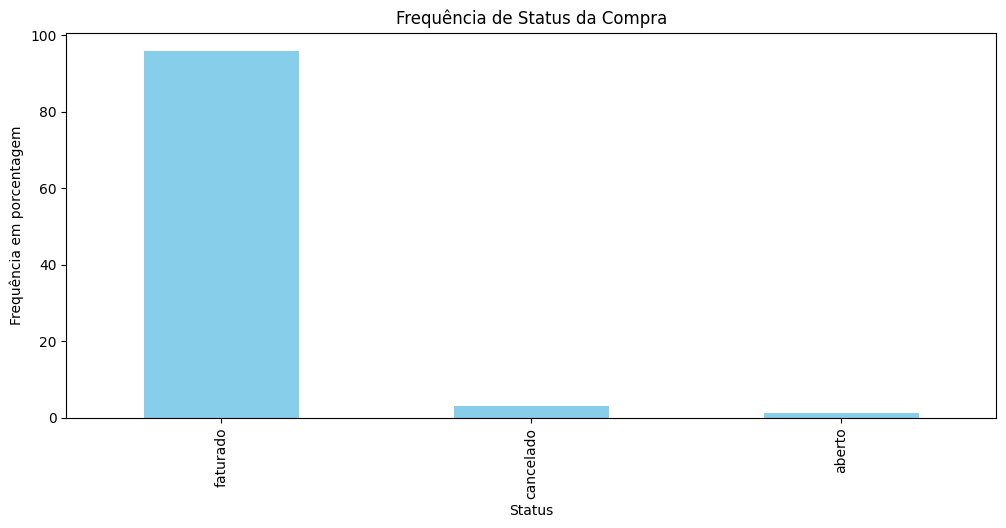

In [26]:
plt.figure(figsize=(12,5))
porc_status.plot(kind='bar', color='skyblue')
plt.title('Frequência de Status da Compra')
plt.xlabel('Status')
plt.ylabel('Frequência em porcentagem')

In [27]:
porc_status

status
faturado    95.88
cancelado    3.00
aberto       1.12
Name: proportion, dtype: float64

Text(0, 0.5, 'Frequência em Quantidades')

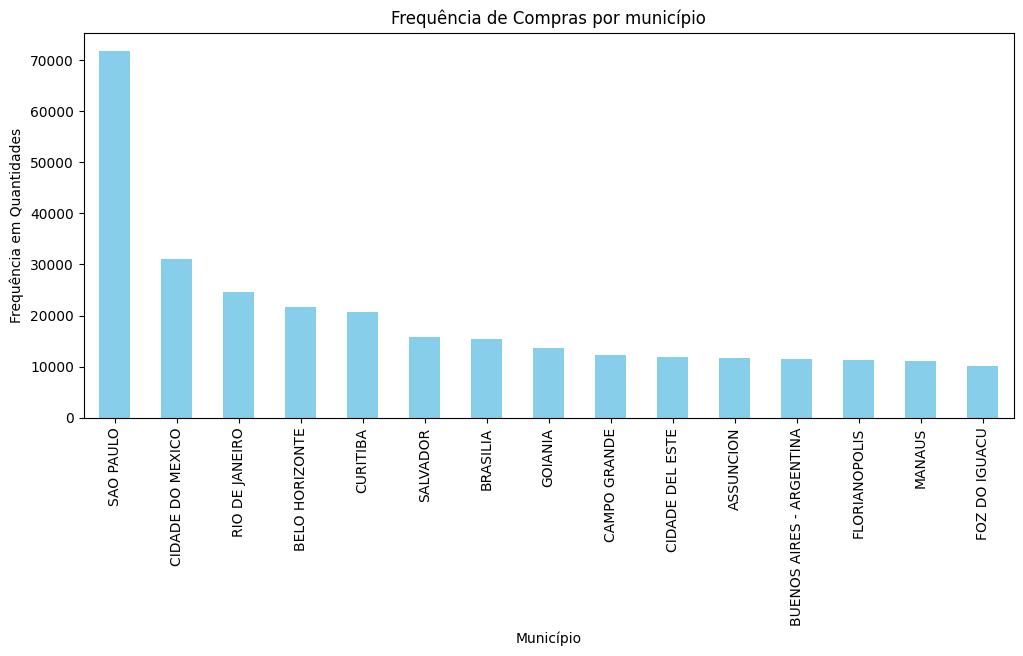

In [28]:
plt.figure(figsize=(12,5))
freqmunicipio.head(15).plot(kind='bar', color='skyblue')
plt.title('Frequência de Compras por município')
plt.xlabel('Município')
plt.ylabel('Frequência em Quantidades')

In [29]:
porc_municipio.head(15)

municipio
SAO PAULO                  3.54
CIDADE DO MEXICO           1.53
RIO DE JANEIRO             1.21
BELO HORIZONTE             1.07
CURITIBA                   1.02
SALVADOR                   0.78
BRASILIA                   0.76
GOIANIA                    0.67
CAMPO GRANDE               0.60
CIDADE DEL ESTE            0.59
ASSUNCION                  0.57
BUENOS AIRES - ARGENTINA   0.57
FLORIANOPOLIS              0.55
MANAUS                     0.55
FOZ DO IGUACU              0.50
Name: proportion, dtype: float64

In [30]:
freqmunicipio.head(15)

municipio
SAO PAULO                   71749
CIDADE DO MEXICO            30985
RIO DE JANEIRO              24524
BELO HORIZONTE              21729
CURITIBA                    20716
SALVADOR                    15814
BRASILIA                    15345
GOIANIA                     13546
CAMPO GRANDE                12187
CIDADE DEL ESTE             11851
ASSUNCION                   11608
BUENOS AIRES - ARGENTINA    11482
FLORIANOPOLIS               11198
MANAUS                      11081
FOZ DO IGUACU               10099
Name: count, dtype: int64

Text(0, 0.5, 'Frequência em Quantidade')

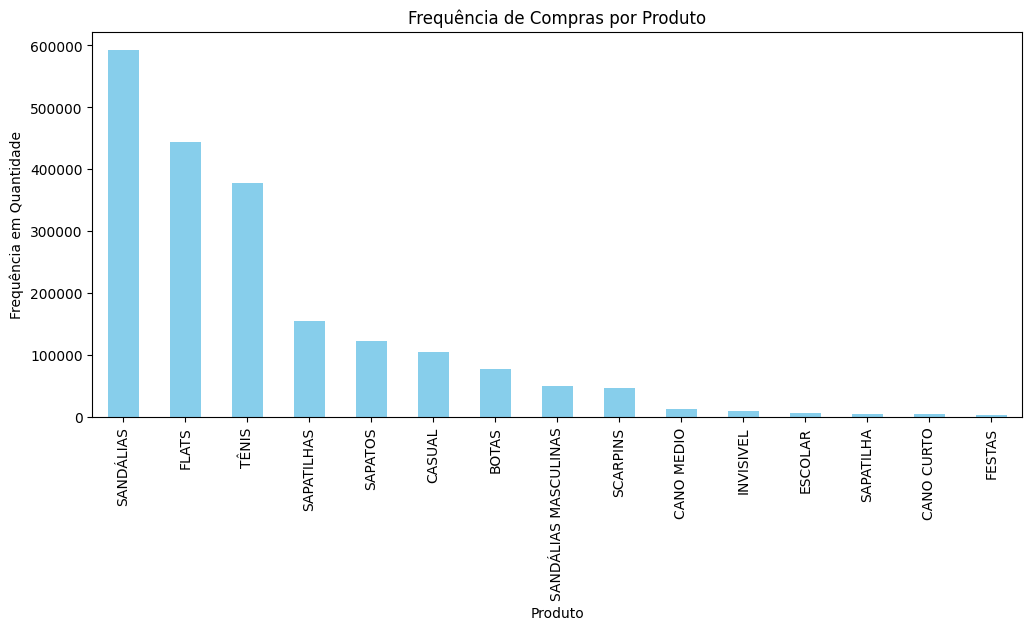

In [31]:
plt.figure(figsize=(12,5))
freqproduto.head(15).plot(kind='bar', color='skyblue')
plt.title('Frequência de Compras por Produto')
plt.xlabel('Produto')
plt.ylabel('Frequência em Quantidade')

In [32]:
porc_produto.head(15)

tipo_produto
SANDÁLIAS              29.23
FLATS                  21.94
TÊNIS                  18.67
SAPATILHAS              7.62
SAPATOS                 6.04
CASUAL                  5.17
BOTAS                   3.81
SANDÁLIAS MASCULINAS    2.44
SCARPINS                2.32
CANO MEDIO              0.66
INVISIVEL               0.44
ESCOLAR                 0.31
SAPATILHA               0.20
CANO CURTO              0.20
FESTAS                  0.15
Name: proportion, dtype: float64

In [33]:
freqproduto.head(15)

tipo_produto
SANDÁLIAS               591759
FLATS                   444218
TÊNIS                   377947
SAPATILHAS              154334
SAPATOS                 122229
CASUAL                  104703
BOTAS                    77129
SANDÁLIAS MASCULINAS     49360
SCARPINS                 47040
CANO MEDIO               13421
INVISIVEL                 8966
ESCOLAR                   6215
SAPATILHA                 4080
CANO CURTO                4011
FESTAS                    3114
Name: count, dtype: int64

Text(0, 0.5, 'Frequência em Quantidade')

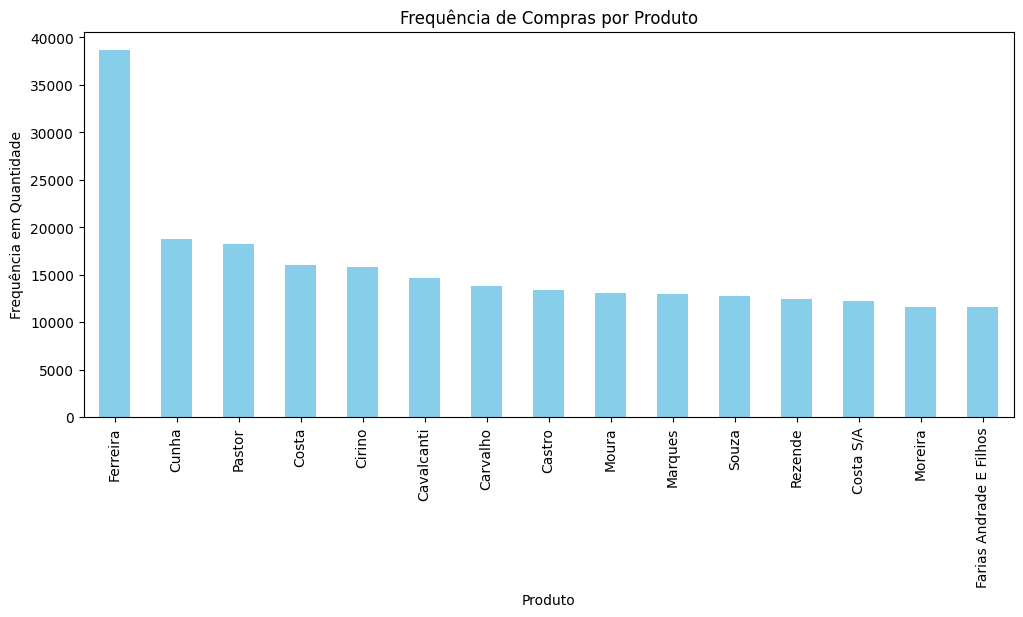

In [34]:
plt.figure(figsize=(12,5))
freqrazaosocial.head(15).plot(kind='bar', color='skyblue')
plt.title('Frequência de Compras por Produto')
plt.xlabel('Produto')
plt.ylabel('Frequência em Quantidade')

In [35]:
freqrazaosocial.head(15)

razao_social
Ferreira                   38634
Cunha                      18774
Pastor                     18277
Costa                      16028
Cirino                     15766
Cavalcanti                 14673
Carvalho                   13861
Castro                     13373
Moura                      13110
Marques                    12982
Souza                      12750
Rezende                    12452
Costa S/A                  12214
Moreira                    11649
Farias Andrade E Filhos    11618
Name: count, dtype: int64

In [36]:
porc_razaosocial.head(15)

razao_social
Ferreira                  1.91
Cunha                     0.93
Pastor                    0.90
Costa                     0.79
Cirino                    0.78
Cavalcanti                0.72
Carvalho                  0.68
Castro                    0.66
Moura                     0.65
Marques                   0.64
Souza                     0.63
Rezende                   0.62
Costa S/A                 0.60
Moreira                   0.58
Farias Andrade E Filhos   0.57
Name: proportion, dtype: float64

In [37]:
df_main.describe()

,data,item,quantidade,desconto,preco
count,2024436,2024436.00,2024436.00,2024436.00,2024436.00
mean,2024-02-16 04:47:42.920044288,3.94,18.68,0.24,54.01
min,2023-01-02 00:00:00,1.00,1.00,-0.92,2.54
25%,2023-07-31 00:00:00,1.00,12.00,-0.12,41.37
50%,2024-02-16 00:00:00,2.00,12.00,-0.08,54.03
75%,2024-09-03 00:00:00,4.00,12.00,0.00,66.01
max,2025-03-31 00:00:00,99.00,25008.00,11.45,205.22
std,NaN,6.37,67.68,1.19,21.76


RETIRANDO AS MEDIAS GERAIS

In [38]:
# Calcular média de todas as colunas numéricas
mednumb = df_main.mean(numeric_only=True)

# Calcular mediana de todas as colunas numéricas
mediananumb = df_main.median(numeric_only=True)

In [40]:
print(mednumb)
print(mediananumb)

item          3.94
quantidade   18.68
desconto      0.24
preco        54.01
dtype: float64
item          2.00
quantidade   12.00
desconto     -0.08
preco        54.03
dtype: float64


AMPLITUDE

In [46]:
dfnumb = df_main.select_dtypes(include=['number']).columns.tolist()
print (dfnumb)

['item', 'quantidade', 'desconto', 'preco']


In [47]:
df_main[dfnumb].describe()

,item,quantidade,desconto,preco
count,2024436.00,2024436.00,2024436.00,2024436.00
mean,3.94,18.68,0.24,54.01
std,6.37,67.68,1.19,21.76
min,1.00,1.00,-0.92,2.54
25%,1.00,12.00,-0.12,41.37
50%,2.00,12.00,-0.08,54.03
75%,4.00,12.00,0.00,66.01
max,99.00,25008.00,11.45,205.22


In [51]:
for variavel in dfnumb:
    amplitude = df_main[variavel].max() - df_main[variavel].min()
    print(f"A amplitude da {variavel} é: ",amplitude)

A amplitude da item é:  98
A amplitude da quantidade é:  25007
A amplitude da desconto é:  12.36986343943891
A amplitude da preco é:  202.68


In [54]:
df_main[dfnumb].var()

item           40.60
quantidade   4580.95
desconto        1.42
preco         473.40
dtype: float64

BOXPLOT PARA VISUALIZAR DADOS E OUTLIERS


In [78]:
df_main[dfnumb].quantile(0.25)


item          1.00
quantidade   12.00
desconto     -0.12
preco        41.37
Name: 0.25, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

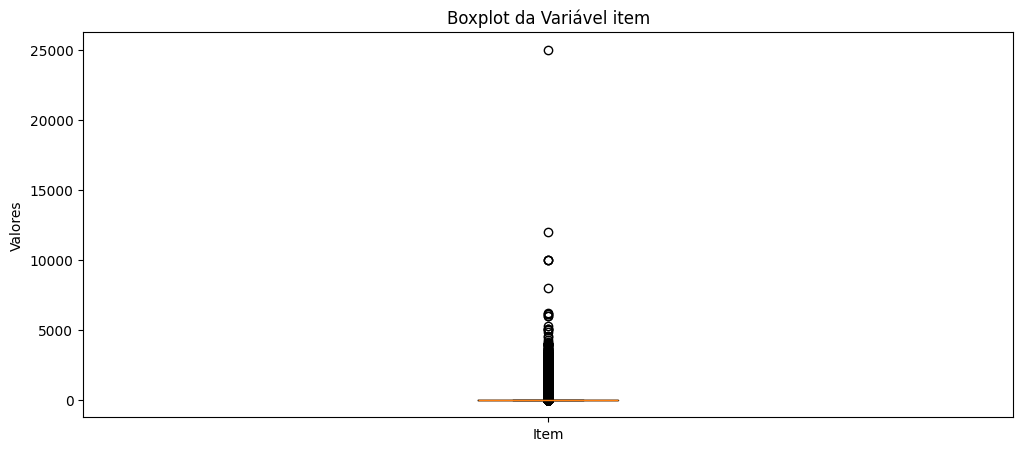

In [83]:
plt.figure(figsize=(12, 5))
plt.boxplot(df_main['quantidade'], tick_labels=['Item'])
plt.title('Boxplot da Variável item')
plt.ylabel('Valores')
plt.show

In [82]:
print("Quantidade acima de 4:", (df_main['quantidade'] <2).sum())
print("Total de dados:", df_main['item'].count())

Quantidade acima de 4: 6649
Total de dados: 2024436


Fixando Quartis

In [79]:
Q1=df_main[dfnumb].quantile(0.25)
Q3=df_main[dfnumb].quantile(0.75)

In [80]:
IQR= Q3 - Q1
IQR

item          3.00
quantidade    0.00
desconto      0.12
preco        24.64
dtype: float64

In [84]:
df_main['quantidade']

0          12
1          16
2           8
3           8
4          12
           ..
2024431    12
2024432    12
2024433    12
2024434    12
2024435    12
Name: quantidade, Length: 2024436, dtype: int64

In [85]:
df_main['quantidade'].describe()

count   2024436.00
mean         18.68
std          67.68
min           1.00
25%          12.00
50%          12.00
75%          12.00
max       25008.00
Name: quantidade, dtype: float64

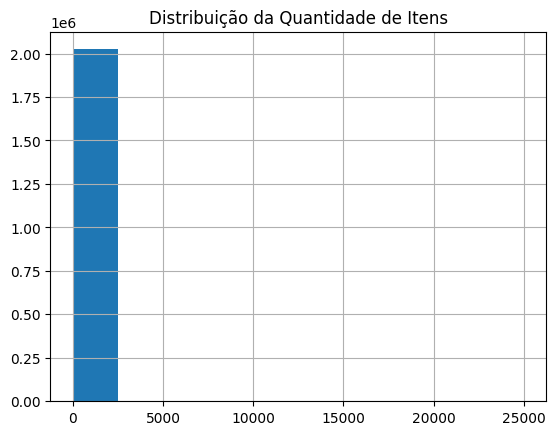

In [87]:
df_main['quantidade'].hist()
plt.title('Distribuição da Quantidade de Itens')
plt.show()

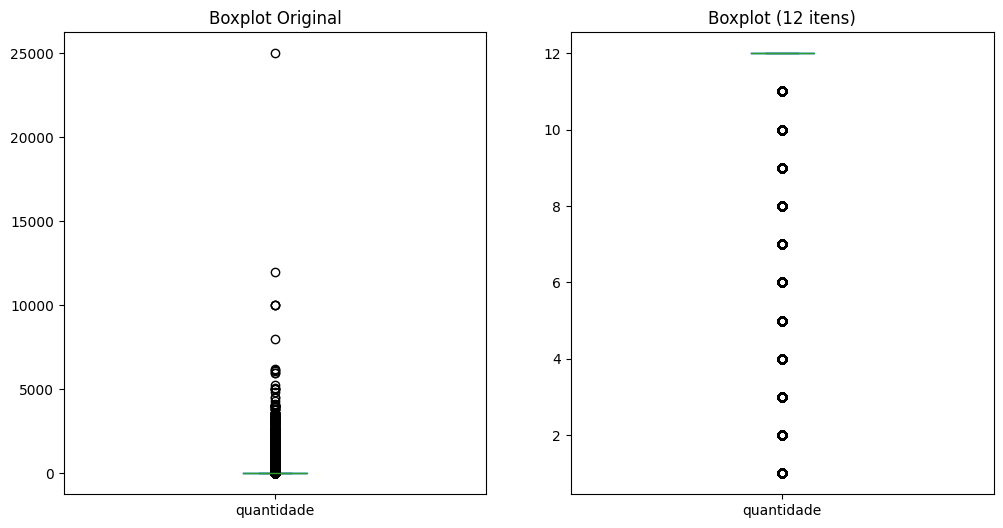


Top 10 maiores valores:
1925028    25008
1711492    12000
920400     10008
920401     10008
1695211    10008
1145864     7992
508644      6216
1161622     6132
898897      6096
1481569     6000
Name: quantidade, dtype: int64


In [89]:
# Análise consolidada
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_main['quantidade'].plot(kind='box')
plt.title('Boxplot Original')

plt.subplot(1, 2, 2)
df_main[df_main['quantidade'] <= 12]['quantidade'].plot(kind='box')
plt.title('Boxplot (12 itens)')
plt.show()

# Top 10 valores mais altos
print("\nTop 10 maiores valores:")
print(df_main['quantidade'].nlargest(10))